# 1.Import Libraries

In [11]:
# Basic setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


# 2.Load Dataset

In [12]:
# Load the raw dataset
data_path = "../data/raw/Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)

# Display first few rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3.Basic Dataset Overview

In [13]:
# Shape and info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Check data types
df.dtypes.value_counts()


Dataset Shape: (7043, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  P

object     18
int64       2
float64     1
Name: count, dtype: int64

# 4.Missing Values Analysis

In [ ]:
# Check total missing values
df.isnull().sum().sum()

0

# 5.Descriptive Statistics

In [16]:
# Numerical summary
df.describe().T

# Categorical summary
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


# 6.Target Variable Analysis

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\2728766942.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


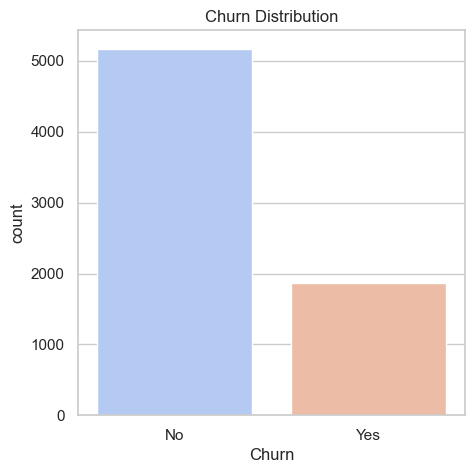

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [17]:
# Target distribution
plt.figure(figsize=(5,5))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title("Churn Distribution")
plt.show()

# Percentage of churn
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)


# 7.Univariate Analysis

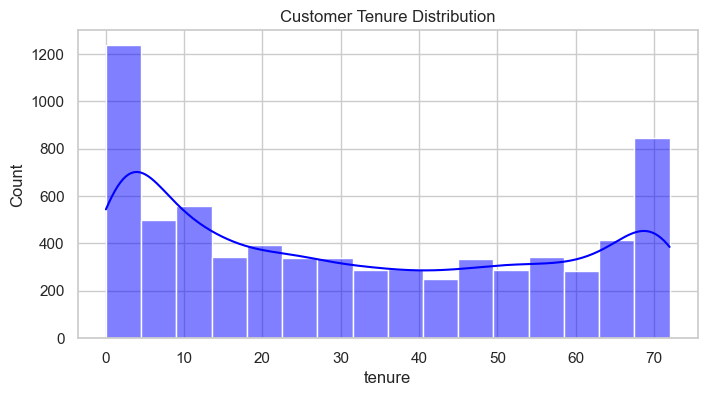

C:\Users\hp\AppData\Local\Temp\ipykernel_7000\4187939249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')


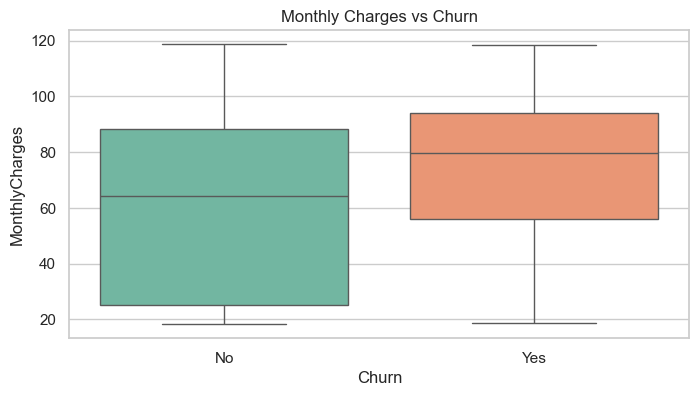

In [18]:
# Example: tenure distribution
plt.figure(figsize=(8,4))
sns.histplot(df['tenure'], kde=True, color='blue')
plt.title("Customer Tenure Distribution")
plt.show()

# Example: monthly charges
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title("Monthly Charges vs Churn")
plt.show()


# 8.Categorical Feature Insights

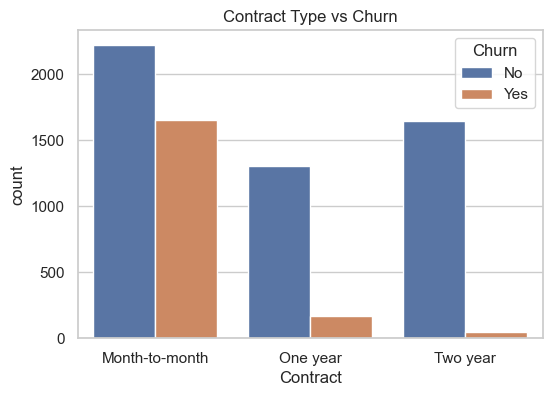

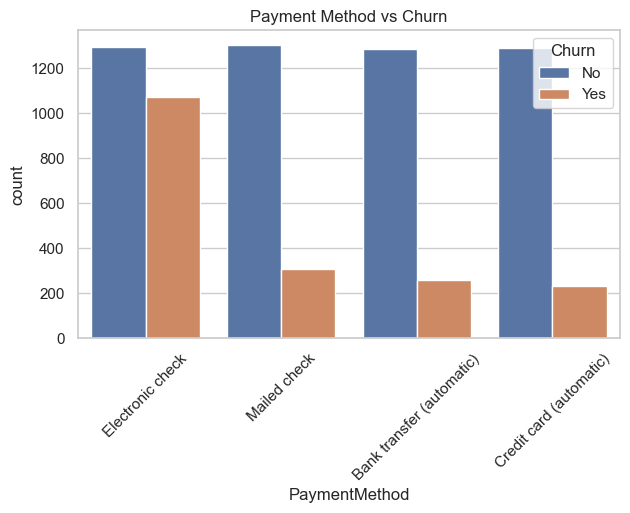

In [19]:
# Compare churn rate by contract type
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.show()

# Compare churn by payment method
plt.figure(figsize=(7,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Payment Method vs Churn")
plt.xticks(rotation=45)
plt.show()


# 9.Correlation Analysis

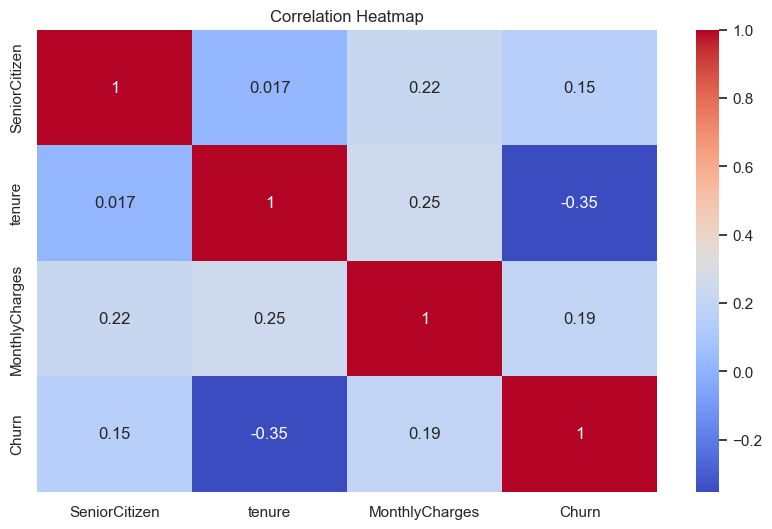

In [20]:
# Encode churn as numeric for correlation
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes':1, 'No':0})

# Compute correlation
corr = df_corr.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# 10. Save for next step

In [21]:
df.to_csv("../data/processed/churn_cleaned.csv", index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.
